# PHY256 Programming template

This is meant to be a repository of many functions used in PHY256 that may come handy in final when you don't have much time to write your own functions.

In [14]:
###########################################################################
# IMPORT STATEMENTS (ADD MORE AS NEEDED)
###########################################################################

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as lg
from typing import Optional, Callable

from matplotlib import animation
from IPython.display import HTML

from random import randint
from math import isclose

In [3]:
###########################################################################
# TYPES OF POTENTIALS (TODO)
###########################################################################


def harmonic_oscillator(k: float, x: np.ndarray) -> np.ndarray:
    """Return the potential for harmonic oscillator, with spring constant k"""
    return 0.5 * k * (x ** 2)
    

def step_potential() -> np.ndarray:
    """Return the step-wise defined potential, similar to the one from the midterm"""
    ...


def vee_shape_potential(x_0: float, m: float, x: np.ndarray) -> np.ndarray:
    """Return the vee-shaped potential with slope m, centered at V(x_0) = 0
    
    Preconditions:
        - any(isclose(x_0, x_1) for x_1 in x)
    """
    x0 = [i - x_0 for i in x if i <= x_0]
    x1 = [i - x_0 for i in x if i > x_0]
    
    v0 = -m * x0
    v1 = m * x1
    
    potential = []
    potential.extend(v0)
    potential.extend(v1)
    
    return potential

In [ ]:
##########################################################################
# TEST POTENTIAL ENERGY FUNCTIONS
##########################################################################


def test_harmonic_potential() -> None:
    ...

In [15]:
###########################################################################
# SOLVING FOR EIGEN-ENERGIES (TODO)
###########################################################################


def solver(dx: float, potential: np.ndarray, grid_size: int) -> tuple[np.ndarray, np.ndarray]:
    """Solve for the eigen-energies and the eigenmodes of the given system."""

    potential_matrix = np.matrix(np.diag(potential))
    kinetic_matrix = -0.5 * np.matrix(
        np.eye(grid_size, k=-1) - 2 * np.eye(grid_size) + np.eye(grid_size, k=+1)) / (dx ** 2)

    eigen_energies, eigvecs = lg.eigh(kinetic_matrix + potential_matrix)

    eigenmodes = eigvecs.T

    return eigen_energies, eigenmodes

In [5]:
###########################################################################
# FUNCTIONS TO DEAL WITH ARBITRARY WFNS
###########################################################################


def normalize(func: np.ndarray, dx: float) -> np.ndarray:
    """Normalize the given function over the interval 0 through 2pi"""
    integral = np.trapz(np.abs(func) ** 2, dx=dx)
    root = np.sqrt(integral)
    return func / root


def evolve(func: np.ndarray, eigenmodes: np.ndarray, eigen_energies: np.ndarray, t: float) -> float:
    """Function for time evolution"""
    N = len(eigenmodes)
    output = 0
    for i in range(N):
        output += np.trapz(eigenmodes(i) * func, dx=d_theta) \
                  * eigenmodes(i) * np.exp(-1j * eigen_energies(i) * t)
    return output

In [7]:
###########################################################################
# ANIMATION FUNCTIONS
###########################################################################


# def animate(i: float, line, wfn: np.ndarray) -> None:
#     """Animating the evolution of wfn after time t"""
#     wt = evolve(wfn, i/15)
#     line.set_data(theta, np.abs(wt) ** 2)


# def animation():
#     ...


# x = np.linspace(0,10,int(1e4))
# W = wavefunction(x,0)
    
# fig = plt.figure()
# line, = plt.plot(x,np.abs(W)**2)
# plt.xlabel("x")
# plt.ylabel("probability density")

# def animate(ti):
#     line.set_data(x,np.abs( wavefunction(x,ti/10) )**2)

# ani = animation.FuncAnimation(fig, animate, frames=50)
# HTML(ani.to_jshtml())

In [8]:
###########################################################################
# STATISTICS FUNCTIONS
###########################################################################


def calculate_avg_std(func: np.ndarray, x: np.ndarray, dx: float) \
        -> tuple[float, float, complex, float]:
    """Return the average position, the standard deviation in position, and the average
    momentum and the standard deviation in momentum"""
    wfn = normalize(func, dx)

    avg_x = np.trapz(wfn.conjugate() * x * wfn, dx=dx)
    std_x = np.abs(np.sqrt(np.trapz(wfn.conjugate() * (x ** 2) * wfn, dx=dx) - (avg_x ** 2)))

    #     print(f"<x> = {avg_x:.4f}")
    #     print(f"Delta x = {std_x:.4f}")

    d_wfn = np.diff(wfn) / dx
    d2_wfn = np.diff(wfn, 2) / (dx ** 2)

    avg_p = -1j * np.trapz(wfn.conjugate()[:-1] * d_wfn, dx=dx)
    std_p = np.abs(np.sqrt(-np.trapz(wfn.conjugate()[:-2] * d2_wfn, dx=dx) - (avg_p ** 2)))

    #     print(f"<p> = {avg_p:.4f}")
    #     print(f"Delta p = {std_p:.4f}")

    return avg_x, std_x, avg_p, std_p


def expectation_val(func: Callable, wfn: np.ndarray, x: np.ndarray, dx: float) \
        -> tuple[float, float]:
    """Return the expectation value and the standard deviation of the func operator"""
    wfn = normalize(wfn, dx)

    out = normalize(func(x), dx)
    out_2 = normalize(func(func(x)), dx)

    avg_func = np.trapz(wfn.conjugate() * out, dx=dx)
    std_func = float(np.abs(np.sqrt(np.trapz(wfn.conjugate()[:-2] * out_2, dx=dx) 
                                    - (avg_func ** 2))))

    return avg_func, std_func

In [9]:
###########################################################################
# TESTING FUNCTIONS AND SANITY CHECKS
###########################################################################


def test_func(func: Optional[np.ndarray] = None) -> np.ndarray:
    """Return the (normalized) test function described in Question 1d of assignment"""
    if func is None:
        w0 = np.exp(1j * theta) + np.exp(3j * theta)
        w0 = normalize(w0, dx=d_theta)
        return w0
    else:
        return func


def test_normalize() -> None:
    """Sanity check. Check whether the normalize function works"""
    func = []
    for _ in range(N):
        func.append(randint(-100, 100))
    func = normalize(func, dx=d_theta)
    integral = np.trapz(np.abs(func) ** 2, dx=d_theta)
    assert isclose(integral, 1, rel_tol=0.01)


def test_evolve_normalize() -> None:
    """Sanity check. Check whether the evolve function retains normalization."""
    func = []
    for _ in range(N):
        func.append(randint(-100, 100))
    func = normalize(func, dx=d_theta)
    time = randint(0, 10000)
    integral = np.trapz(np.abs(evolve(func, time)) ** 2, dx=d_theta)

    assert isclose(integral, 1, rel_tol=0.01)

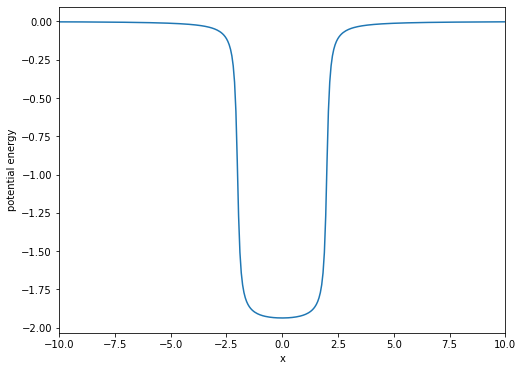

In [12]:
N = 1000       # number of discrete points on the spatial grid
x = np.linspace(-30,30,N)
dx = x[1]-x[0]

def V(x):
    return (np.arctan((x-2)/0.1)/(np.pi/2) - np.arctan((x+2)/0.1)/(np.pi/2))

potential = V(x)

plt.figure(figsize=(8,6))
plt.plot(x,V(x))
plt.xlim(-10,10)
plt.xlabel("x")
plt.ylabel("potential energy")
plt.show()

In [16]:
eigen_energies, eigenmodes = solver(dx, potential, N)

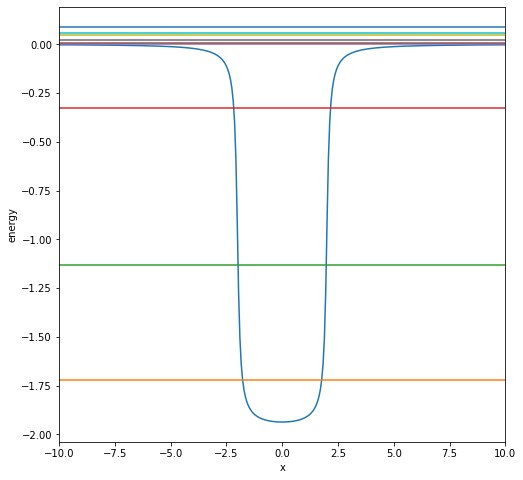

In [17]:
plt.figure(figsize=(8,8))
plt.plot(x,V(x))
plt.xlim(-10,10)
plt.xlabel("x")
plt.ylabel("energy")
for i in range(10):     
    plt.plot(x,eigen_energies[i]*np.ones(len(x)),color=f"C{i+1}")
plt.show()

In [19]:
len(x) == len(harmonic_oscillator(1, x))

True